In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import datasets
from sklearn.pipeline import Pipeline
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML_Project/Dataset/data.csv')

In [ ]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
data.shape

(6819, 96)

In [ ]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
data.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [ ]:
data.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [ ]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
# Renaming the columns
rename_list = ["X" + str(i) for i in range(1,96)]
rename_list.insert(0,"Y")
mapper = {}
i = 0
for col in data.columns:
    mapper[col] = rename_list[i]
    i+=1
df = data.rename(columns=mapper)
df

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [ ]:
X = df.iloc[:,1:96]
y = df.iloc[:,0]

In [ ]:
X.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
X1,-0.323941,6.390770
X2,-1.033727,9.038785
X3,-0.763564,7.929074
X4,-8.043368,365.540671
X5,-8.066572,367.041830
...,...,...
X91,27.459467,1209.203491
X92,45.724197,2475.433404
X93,-13.939528,911.800905
X94,0.000000,0.000000


In [ ]:
skew_list = []
pos_skew = []
neg_skew = []
less_skew = []

for i in X.columns:
  skew_list.append(X[i].skew())

print(skew_list)

for i in X.columns:
  if X[i].skew() > 0.50000000000:
    pos_skew.append(i)
  if X[i].skew() < -0.50000000000:
    neg_skew.append(i)
  if X[i].skew() > -0.51000000000 and X[i].skew() < 0.49000000000 :
    less_skew.append(i)

print(pos_skew)
print(neg_skew)
print(less_skew)

[-0.3239410032376897, -1.0337268374435982, -0.7635637191791648, -8.043367962976834, -8.066572143637043, -70.23716436128285, -52.48286652280293, -52.99574381463863, 39.64168918755239, -53.200120791151186, 1.2486733165601693, 1.2820432317125836, 3.990585538817217, 7.033376780370779, 1.903875252639803, 4.562322576989663, 4.518132057298601, 4.513740533156161, 5.13596305293763, 8.018983552793829, 43.7690982625658, 8.811855619678495, 6.002590150781108, 77.92510905908482, -71.68895016582744, -25.58336694298504, -25.262840959449818, 67.09753430866733, -0.9187910949038905, 80.29184419453097, 62.499961053073136, 2.318244374516142, 82.57723657279894, 31.644913015411564, -16.822554123130764, 46.355335845692984, 0.98079611678978, -0.9807961167897898, 24.96787271736492, 20.838890887338852, 79.67062005225556, 8.949387100606499, 6.379425570765882, 13.112234234219, 2.3409066223409676, 25.84654655099649, 30.58008623206861, 1.1372886202283368, 2.349802853236018, 8.9618483104736, 59.434479930512104, 7.788

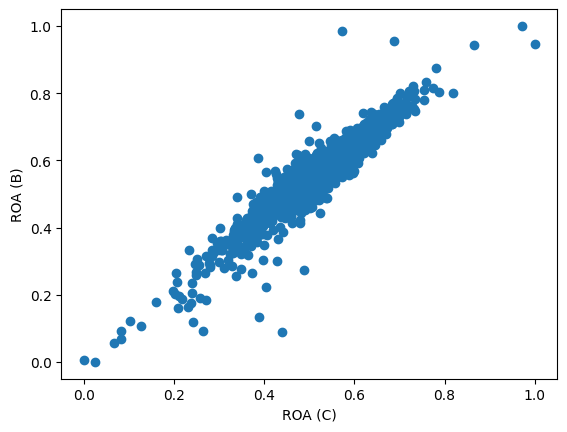

In [ ]:
# Relation between highly correlated features
# Which will result in Multicollinearity
plt.scatter(df['X1'], df['X2'])
plt.xlabel("ROA (C)")
plt.ylabel("ROA (B)")
plt.show()

**VarianceThreshold**

simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.
It doesn't depend on output/labels

In [ ]:
vt = VarianceThreshold()
t = vt.fit(X)
t.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True])

In [ ]:
X = X.drop(columns="X94")

Multicollinearity Removal

In [ ]:
cor_matrix = X.corr()
cor_matrix

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X85,X86,X87,X88,X89,X90,X91,X92,X93,X95
X1,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,...,-0.109272,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,0.052416
X2,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,0.049909,...,-0.156890,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,0.057887
X3,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,0.052261,...,-0.120680,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,0.056430
X4,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,0.029430,...,-0.032930,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,0.120029
X5,0.332755,0.324956,0.331755,0.999518,1.000000,0.005610,0.032232,0.026851,0.051242,0.029166,...,-0.032920,0.298155,0.022750,0.004038,0.999518,0.074891,-0.085407,-0.011268,-0.001158,0.120196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X90,0.274287,0.291744,0.280617,0.075304,0.074891,0.006216,0.011343,0.010648,0.007693,0.011191,...,0.192688,0.328492,-0.040217,0.000127,0.075303,1.000000,-0.791836,-0.000093,0.005147,0.029622
X91,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,-0.002996,...,-0.229559,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,-0.159654
X92,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,0.000774,...,-0.001717,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,-0.016739
X93,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,0.000798,...,-0.000974,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,-0.008339


In [ ]:
related_attributes = []
for i in range(len(cor_matrix.columns)):
    for j in range(len(cor_matrix.index) - i):
        if cor_matrix.iloc[i,j] > 0.9:
            related_attributes.append((cor_matrix.columns[i],cor_matrix.index[j]))
related_attributes

[('X1', 'X1'),
 ('X1', 'X2'),
 ('X1', 'X3'),
 ('X2', 'X1'),
 ('X2', 'X2'),
 ('X2', 'X3'),
 ('X2', 'X86'),
 ('X3', 'X1'),
 ('X3', 'X2'),
 ('X3', 'X3'),
 ('X3', 'X86'),
 ('X4', 'X4'),
 ('X4', 'X5'),
 ('X4', 'X89'),
 ('X5', 'X4'),
 ('X5', 'X5'),
 ('X5', 'X89'),
 ('X6', 'X6'),
 ('X6', 'X7'),
 ('X6', 'X10'),
 ('X7', 'X6'),
 ('X7', 'X7'),
 ('X7', 'X8'),
 ('X7', 'X10'),
 ('X8', 'X7'),
 ('X8', 'X8'),
 ('X8', 'X10'),
 ('X9', 'X9'),
 ('X10', 'X6'),
 ('X10', 'X7'),
 ('X10', 'X8'),
 ('X10', 'X10'),
 ('X11', 'X11'),
 ('X12', 'X12'),
 ('X13', 'X13'),
 ('X14', 'X14'),
 ('X15', 'X15'),
 ('X16', 'X16'),
 ('X16', 'X17'),
 ('X16', 'X18'),
 ('X17', 'X16'),
 ('X17', 'X17'),
 ('X17', 'X18'),
 ('X18', 'X16'),
 ('X18', 'X17'),
 ('X18', 'X18'),
 ('X19', 'X19'),
 ('X19', 'X23'),
 ('X19', 'X43'),
 ('X20', 'X20'),
 ('X21', 'X21'),
 ('X22', 'X22'),
 ('X22', 'X42'),
 ('X23', 'X19'),
 ('X23', 'X23'),
 ('X23', 'X43'),
 ('X24', 'X24'),
 ('X25', 'X25'),
 ('X26', 'X26'),
 ('X26', 'X27'),
 ('X27', 'X26'),
 ('X27', 'X27')

In [ ]:
def handle_Multico_Corr(DATA,sl=0.9):

    """[summary]
        DESCRIPTION :-
            This Methoud could be used on large or small both type of dataset

        PARAMETERS :-
            DATA = Pandas DataFrame
            sl = Columns with Corr > than 0.7 (default) will be removed
        Returns:

            Updated DataFrame after removing Multicollniearity

    """


    x_df=DATA
    corr=x_df.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)

    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[0]):
            if abs(corr.iloc[i, j]) >= sl:
                if columns[j]:
                    columns[j] = False

    selected_columns = x_df.columns[columns]


    return x_df[selected_columns]

In [ ]:
X = handle_Multico_Corr(X)
X.head()

,X1,X4,X6,X9,X11,X12,X13,X14,X15,X16,...,X82,X83,X84,X85,X87,X88,X90,X92,X93,X95
0,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,...,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,0.016469
1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,...,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,0.020794
2,0.426071,0.601450,0.998857,0.302035,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,...,0.538491,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,0.016474
3,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,0.154187,...,0.604105,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,0.023982
4,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,...,0.578469,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,0.035490


In [ ]:
X.columns

Index(['X1', 'X4', 'X6', 'X9', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X19',
       'X20', 'X21', 'X22', 'X24', 'X25', 'X26', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X39', 'X40', 'X41', 'X44',
       'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54',
       'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64',
       'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74',
       'X76', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X87', 'X88',
       'X90', 'X92', 'X93', 'X95'],
      dtype='object')

In [ ]:
X.shape, y.shape

((6819, 75), (6819,))

Recursive Feature Elimination

In [ ]:
rfecv_rf = RFECV(estimator=RandomForestClassifier())
selector_rf = rfecv_rf.fit(X, y)
X.columns[selector_rf.support_]

Index(['X1', 'X9', 'X14', 'X16', 'X19', 'X30', 'X31', 'X34', 'X35', 'X36',
       'X37', 'X40', 'X46', 'X57', 'X59', 'X62', 'X65', 'X69', 'X88', 'X90',
       'X92', 'X93', 'X95'],
      dtype='object')

In [ ]:
X.columns[selector_rf.support_]

In [ ]:
X = X[X.columns[selector_rf.support_]]

In [ ]:
X.shape

(6819, 23)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
k = X.columns
X_new = scaler.fit_transform(X)
X_new = pd.DataFrame(X, columns = k)

In [ ]:
#splitting the data train and test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, stratify = y, train_size=0.8, random_state=42)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, stratify = y_train, train_size=0.9, random_state=42)

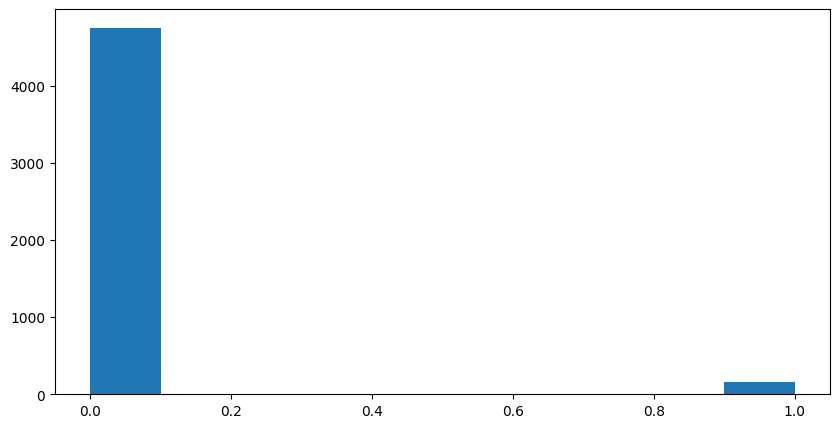

In [ ]:
plt.figure(figsize = (10,5))
plt.hist(y_train_final)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_final=np.array(X_train_final)
X_train, y_train = smote.fit_resample(X_train_final, y_train_final)

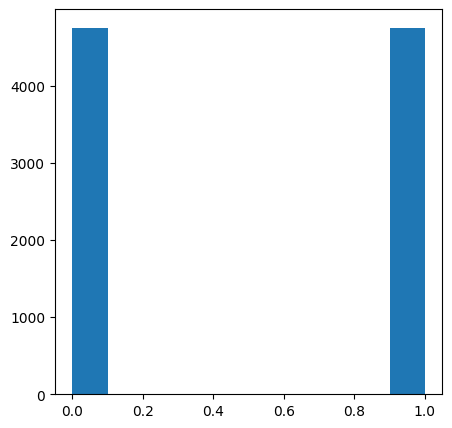

In [ ]:
plt.figure(figsize = (5,5))
plt.hist(y_train)
plt.show()

In [ ]:
X_train = pd.DataFrame(X_train, columns = k)
X_train.shape

(9502, 23)

Random Forest

In [ ]:
param_grid = {
    "n_estimators" : [50, 100, 150, 200, 300],
    "criterion" : ['gini', 'entropy', 'log_loss'],
    "max_features" : ['sqrt', 'log2']
}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,verbose = 5, scoring = "f1")
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END criterion=gini, max_features=sqrt, n_estimators=50;, score=0.976 total time=   1.2s
[CV 2/5] END criterion=gini, max_features=sqrt, n_estimators=50;, score=0.971 total time=   1.3s
[CV 3/5] END criterion=gini, max_features=sqrt, n_estimators=50;, score=0.977 total time=   1.3s
[CV 4/5] END criterion=gini, max_features=sqrt, n_estimators=50;, score=0.980 total time=   1.4s
[CV 5/5] END criterion=gini, max_features=sqrt, n_estimators=50;, score=0.974 total time=   1.4s
[CV 1/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.979 total time=   2.5s
[CV 2/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.972 total time=   2.4s
[CV 3/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.978 total time=   2.5s
[CV 4/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.982 total time=   2.4s
[CV 5/5] END criterion=gini, max_features=sqrt, n_estimators=

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='f1', verbose=5)

In [ ]:
rf_cv.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 300}

In [ ]:
rf = RandomForestClassifier(criterion =  'gini', max_features = 'sqrt', n_estimators =  300)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
y_predict_rf = rf.predict(X_val)
print(classification_report(y_val, y_predict_rf))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       528
           1       0.26      0.50      0.34        18

    accuracy                           0.94       546
   macro avg       0.62      0.73      0.65       546
weighted avg       0.96      0.94      0.95       546



In [ ]:
y_predict__test_rf = rf.predict(X_test)
print(classification_report(y_test, y_predict__test_rf))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1320
           1       0.38      0.66      0.48        44

    accuracy                           0.95      1364
   macro avg       0.68      0.81      0.73      1364
weighted avg       0.97      0.95      0.96      1364



Decision Tree

In [ ]:
param_grid = {
    "n_estimators" : [50, 100, 150, 200, 300],
    "criterion" : ['gini', 'entropy', 'log_loss'],
    "max_features" : ['sqrt', 'log2']
}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,verbose = 5, scoring = "f1")
rf_cv.fit(X_train, y_train)

In [ ]:
# Define the hyperparameter grid for Decision Tree
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None,10,50],
}

# Create a GridSearchCV object with cross-validation
dt_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, verbose=5, scoring="f1")

# Fit the GridSearchCV to the training data
dt_cv.fit(X_train, y_train)

In [ ]:
dt_cv.best_params_

In [ ]:
print("Best F1 Score:", dt_cv.best_score_)

Support Vector Machine

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

In [ ]:
y_predict_svc = svc.predict(X_val)
print(classification_report(y_val, y_predict_svc))

In [ ]:
y_predict_test_svc = svc.predict(X_test)
print(classification_report(y_test, y_predict_test_svc))

Logistic Regression

In [ ]:
param_grid = {
    "penalty" : ['l1', 'l2','elasticnet', 'none'],
    "C": [0.0001, 1 ,10]
}
lr_cv = GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,verbose = 5, scoring = "f1")
lr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ................C=0.0001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ................C=0.0001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ................C=0.0001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ................C=0.0001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ................C=0.0001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ..............C=0.0001, penalty=l2;, score=0.361 total time=   0.0s
[CV 2/5] END ..............C=0.0001, penalty=l2;, score=0.198 total time=   0.0s
[CV 3/5] END ..............C=0.0001, penalty=l2;, score=0.135 total time=   0.0s
[CV 4/5] END ..............C=0.0001, penalty=l2;, score=0.185 total time=   0.0s
[CV 5/5] END ..............C=0.0001, penalty=l2;, score=0.118 total time=   0.0s
[CV 1/5] END ........C=0.0001, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END ........C=0.0001, penalty=elasticne

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1', verbose=5)

In [ ]:
lr_cv.best_params_

{'C': 0.0001, 'penalty': 'l2'}

In [ ]:
lr = LogisticRegression(C= 0.0001, penalty= 'l2')
lr.fit(X_train, y_train)

LogisticRegression(C=0.0001)

In [ ]:
y_predict_lr = lr.predict(X_val)
print(classification_report(y_val, y_predict_lr))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       528
           1       0.50      0.11      0.18        18

    accuracy                           0.97       546
   macro avg       0.74      0.55      0.58       546
weighted avg       0.95      0.97      0.96       546



In [ ]:
y_predict_test_lr = lr.predict(X_test)
print(classification_report(y_test, y_predict_test_lr))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.43      0.14      0.21        44

    accuracy                           0.97      1364
   macro avg       0.70      0.57      0.59      1364
weighted avg       0.95      0.97      0.96      1364

